<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/barcode_validator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sbooeshaghi/BMGP_2020

Cloning into 'BMGP_2020'...
remote: Enumerating objects: 942, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 942 (delta 54), reused 6 (delta 1), pack-reused 817
Receiving objects: 100% (942/942), 474.48 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (378/378), done.
Checking out files: 100% (155/155), done.


In [65]:
!pip install --quiet --upgrade blackcellmagic

     |████████████████████████████████| 89 kB 4.1 MB/s 
     |████████████████████████████████| 8.5 MB 15.0 MB/s 
     |████████████████████████████████| 61 kB 6.7 MB/s 
     |████████████████████████████████| 428 kB 72.0 MB/s 
     |████████████████████████████████| 395 kB 56.7 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 130 kB 65.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


In [2]:
%load_ext blackcellmagic
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
fb_fn = "BMGP_2020/references/scispace/kite/feature_barcodes.txt"

In [4]:
#@title Example barcodes
# MULTISEQ
bcs = [
  "GGAGAAGA",
  "CCACAATG",
  "CCAACCGG",
  "CGAAGCCC",
  "TCAGTCGA",
  "GACCAGCC",
  "CTCAAGGT",
  "CGCCGCAA",
  "ACCAGCCG",
]

bcs_names = [
"BC1",
"BC2",
"BC13",
"BC25",
"BC37",
"BC49",
"BC50",
"BC73",
"BC74",
]


# 10xCRISPR
bcs = [
       "GGCAACGCGACCCCACGAG",
       "ATGTCACCCCCAGACCCCG",
       "TGCAGCGCCGGCGACTCAC",
       "CGGGGCACCGGTGAGTCGC",
       "CACTCGGCGGACGCAAGGG",
       "GCGCACTCGGCGGACGCAA",
       "TGCTGCTTCGGCGACCGGG",
       "TTCTCGCGGGACACCGACG",
       "AGCCCAAGCCAGAGCGGCG",
       "GAGCGGCGCGGCCTGGAAG",
       "ACCCGAGCCGCACCCGCCG",
       "GCACGGGCGGCGGAGACTC",
       "AGCAGGGCTCTCCTCCCGG",
       "TGTGGCTGAAGCAGCGAGG",
       "GGAGAGGCGCAGCATCCAC",
       "GAGGCGCAGCATCCACAGG",
       "GAGCGAGGAGGGCGCTACG",
       "GTCGCTATCGGAGGCCGCG",
       "CACCAGATACAGCGCTCTG",
       "GCGGCAGCGCGGTCAGTGG",
       "GAGCCTCAGCGAGCGGAGG",
       "CTGGAGCCTCAGCGAGCGG",
       "GACGAAGTCTATAAAGGGC",
       "CATGGCGTGAGTACCGGGG",
       "TCCTCCTCAGCAGCACCGG",
       "GTCATGGAGCGGAACGCCA",
       "ACTTTGCTGTACCCATCAG",
       "AGGCCCAGTCATCCTACAC",
       "ATGTTGGCCGCCGCTGCGA",
       "GACGGGAGGATGGAGTCGA",
       "CTTCCACCACAGGTACCTA",
       "CCTCGCCTGGCTGCTCCCT",
       "CCGGCCGGGCGGCGAGTAG",
       "TGCTGATAAGGGAAGGGAC",
       "GCTGCTGCCACAGACCGAG",
       "CCCCGGGAGCGGAGAGCGA",
       "AAACGCACAGCAACTCGCA",
       "GGCGAAATGGCTCCGACCG",
       "CACAGGAGACCATGTCCGG",
       "AGGGCAGCGAGAGGTTCGC",
       "GAGCTTTCGCAGCTGGAGA",
       "TCACTATCTCCCGGGTGAA",
       "GGCCCGCGCGGCACTTACG",
       "GCGCGGGCGGGAAGCGAAG",
       "GCGCGGGCAGCGTGAAGCG",
       "GCGCGTGCGTACGCGACGG",
       "CGGACCTCGGGATCTGGGT",
       "CCGGGCGCTGTCGGACCTC",
       "CCTTGCACCGGGCTTTGCA",
       "CGCCGGCCGCGGTTCTCCC",
       "CCGGCCCAGGATGTAGAGC",
       "CTGCGGGCGCTGGCAAATC",
       "TGGTGTCATGGCAGCTGCG",
       "ACGCTTCGGGTTGGTGTCA",
       "GAGATCCGCGGAGGCCGAC",
       "CGACGGCAGAGGGGCCTAA",
       "CCGCCATGGCCGACAAGGA",
       "GTGCAGTCCCCGGTACTGA",
       "CCCAAGCGCCTACTCGCAC",
       "CTGCGAAAGCGCCAGGGTG",
       "GATCGCCGAGCGCGAGTGA",
       "GGGAGAGCGAGCAGCGAGC",
       "CTCAGGGCAGCGAGACTAT",
       "GCCGGCCGGCCGGCACGGG",
       "TTTTGGGCCGCGGCGGGAG",
       "GTCTCACCATGGAGCGGAA",
       "AGACGGAGCTCTTGAGTAG",
       "TGAGTAGAGGGCCGAAGAG",
       "CCGGCGGGTAGCTGGCGGG",
       "AGGCTCCGGCGGACCGAGG",
       "ACTTCGGTCGCGGGCGGTG",
       "GAAACGCTGCCGCTGAGGG",
       "GTTAGAGCCCGTGCGGAGG",
       "CTGCGGCGGAGCCTCCTTA",
       "TGCGTGAGGCGAGAGGAGC",
       "ACGCACGAGTGGAAGTCCC",
       "CGACACCGCGGCTTCCGCG",
       "GCCCGTCGGCGGGTGTCGA",
       "GCCCCGCTCGGCGATACCC",
       "GTCGCGTCCGACACCCGGT",
       "TACAGCAACAAGGCTGAGA",
       "GTCTTGGCCTGTTCCTCAA",
       "CGAGCCGGGACCCTGGTAC",
       "CTGGAGCGCGGCAGGTGAG",
       "GCCGGCGAACCAGGAAATA",
       "AGCGATAGCTGAGTGGCGG",
       "GCGCAGGCAGAAGTCACCG",
       "ACTCCACCGCCCGGAGCAG",
       "ACCGACTGACGGTAGGGAC",
       "GGACGGGAGGCGAGCAAGA",
]

bcs_names = [
"APH1A-1",
"APH1A-2",
"CDKN3-1",
"CDKN3-2",
"EZR-1",
"EZR-2",
"GRB2-1",
"GRB2-2",
"GSK3A-1",
"GSK3A-2",
"HRAS-1",
"HRAS-2",
"JUN-1",
"JUN-2",
"PPIB-1",
"PPIB-2",
"SNRNP70-1",
"SNRNP70-2",
"SNRNP40-1",
"SNRNP40-2",
"PPP2CA-1",
"PPP2CA-2",
"ATF4-1",
"ATF4-2",
"BAZ1B-1",
"BAZ1B-2",
"BRD4-1",
"BRD4-2",
"CAMLG-1",
"CAMLG-2",
"CSNK2A1-1",
"CSNK2A1-2",
"CTCF-1",
"CTCF-2",
"CTNNB1-1",
"CTNNB1-2",
"DHX9-1",
"DHX9-2",
"EIF4EBP1-1",
"EIF4EBP1-2",
"ELOF1-1",
"ELOF1-2",
"H2AFY-1",
"H2AFY-2",
"KDM1A-1",
"KDM1A-2",
"LMNA-1",
"LMNA-2",
"MBNL1-1",
"MBNL1-2",
"MORF4L1-1",
"MORF4L1-2",
"NOC2L-1",
"NOC2L-2",
"PAIP2-1",
"PAIP2-2",
"RBBP4-1",
"RBBP4-2",
"RBM25-1",
"RBM25-2",
"SET-1",
"SET-2",
"SMARCD1-1",
"SMARCD1-2",
"SRPK1-1",
"SRPK1-2",
"SRRT-1",
"SRRT-2",
"SUZ12-1",
"SUZ12-2",
"TPR-1",
"TPR-2",
"TRA2B-1",
"TRA2B-2",
"UBE2N-1",
"UBE2N-2",
"UBXN1-1",
"UBXN1-2",
"EZH2-1",
"EZH2-2",
"ACE2-1",
"ACE2-2",
"TMPRSS2-1",
"TMPRSS2-2",
"RAB1A-2",
"RAB1A-3",
"DPP4-1",
"DPP4-2",
"HDAC1-1",
"HDAC1-2",
]

In [5]:
bcs = []
bcs_names = []
with open(fb_fn, 'r') as f:
  for l in f.readlines():
    l = l.strip()
    bc, n = l.split("\t")
    bcs.append(bc)
    bcs_names.append(n)

# Validation

## Length validation

In [6]:
bc_len = min([len(i) for i in bcs])
max_bcs = 4**bc_len
max_bcs

1048576

## Shared subsequence

In [7]:
def kmerize(s, k):
  L = len(s)
  return [s[i:i+k] for i in range(L-k+1)]
kmerize("sina" ,3)

['sin', 'ina']

In [8]:
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'} 
def rev_c(seq):
    bases = list(seq) 
    bases = reversed([complement.get(base,base) for base in bases])
    bases = ''.join(bases)
    return bases
rev_c("ATC")

'GAT'

In [9]:
from collections import defaultdict
def check_kmers(bcs, bcs_names, k=None):
  length = min([len(i) for i in bcs])
  if not k:
    k = length if length % 2 else length - 1
    print(f"Optimal kmer length: {k}")

  d = defaultdict(list)
  for bc, bc_name in zip(bcs, bcs_names):
    # forward strand
    kmers = kmerize(bc, k)
    for kmer in kmers:
      d["".join(kmer)].append(bc_name)
    
    # reverse complement strand
    kmers = kmerize(rev_c(bc), k)
    for kmer in kmers:
      d["".join(kmer)].append(bc_name + "_rc")
  return d

In [15]:
def make_ec(bcs, bcs_names, k=None):
  length = min([len(i) for i in bcs])
  if not k:
    k = length # length if length % 2 else length - 1
    # print(f"Optimal kmer length: {k}")
  d = defaultdict(list)
  for bc, bc_name in zip(bcs, bcs_names):
    # forward strand
    kmers = kmerize(bc, k)
    for kmer in kmers:
      d[''.join(kmer)].append(bc_name)
  return d

In [16]:
blah = make_ec(bcs, bcs_names)

In [17]:
def ham(k1, k2):
    first  = np.array(list(k1))
    second = np.array(list(k2))
    dist = (first!=second).sum()
    return dist

In [31]:
def cmp_kmers(ecs, rc = False):
  kmers = list(ecs.keys())
  ecs = list(ecs.values())
  d = defaultdict()
  n = len(kmers)
  nc = n*(n-1)//2
  c = 0
  for i in range(n):
    for j in range(i+1, n):
      c += 1
      if c % 100_000 == 0:
        print(f"{c:,.0f}")
      k1, k2 = kmers[i], kmers[j]
      
      # if comparing kmer to revc of other kmers
      if rc:
        k2 = rev_c(k2)
      
      dist = ham(k1, k2)
      d[(kmers[i], kmers[j])] = dist
  return d

In [33]:
d = pd.Series(cmp_kmers(make_ec(bcs, bcs_names), rc=True))

100,000
200,000
300,000
400,000
500,000
600,000
700,000
800,000
900,000
1,000,000
1,100,000
1,200,000


In [47]:
[(blah[i],blah[j]) for i,j in d.nsmallest(10).index]

[(['RT_537'], ['RT_703']),
 (['RT_983'], ['RT_1115']),
 (['slide_1F'], ['RT_195']),
 (['sector6'], ['RT_209']),
 (['sector8'], ['RT_727']),
 (['sector9'], ['RT_594']),
 (['RT_227'], ['RT_775']),
 (['RT_228'], ['RT_978']),
 (['RT_232'], ['RT_1008']),
 (['RT_237'], ['RT_1327'])]

### Varying length of subesequnce

In [37]:
# across multiple kmer lengths
kmer_lens = np.arange(2, bc_len + 1)
ambig_bcs = []
for kmer_len in kmer_lens:
  # Determine the set of ambiguous barcodes
  ambig_bc = set()
  for i in check_kmers(bcs, bcs_names, kmer_len).values():
    if len(i) > 1:
      for j in i:
        ambig_bc.add(j.split("_")[0])
  ambig_bcs.append(list(ambig_bc))


[['RT',
  'sector5',
  'sector7',
  'sector11',
  'sector13',
  'sector16',
  'sector6',
  'sector9',
  'slide',
  'sector3',
  'sector12',
  'sector2',
  'sector1',
  'sector10',
  'sector4',
  'sector14',
  'sector15',
  'sector8'],
 ['RT',
  'sector5',
  'sector13',
  'sector7',
  'sector16',
  'sector6',
  'sector9',
  'slide',
  'sector3',
  'sector12',
  'sector10',
  'sector2',
  'sector11',
  'sector1',
  'sector4',
  'sector14',
  'sector15',
  'sector8'],
 ['RT',
  'sector5',
  'sector7',
  'sector13',
  'sector16',
  'sector6',
  'sector9',
  'slide',
  'sector3',
  'sector12',
  'sector10',
  'sector2',
  'sector11',
  'sector1',
  'sector4',
  'sector14',
  'sector15',
  'sector8'],
 ['RT',
  'sector5',
  'sector7',
  'sector13',
  'sector16',
  'sector6',
  'sector9',
  'slide',
  'sector3',
  'sector12',
  'sector1',
  'sector11',
  'sector10',
  'sector2',
  'sector4',
  'sector14',
  'sector15',
  'sector8'],
 ['RT',
  'sector5',
  'sector7',
  'sector13',
  'sector11'

In [13]:
i = 0
for k, v in check_kmers(bcs, bcs_names, k=10).items():
  if len(v) > 1:
    i += 1
    print(i, k, v)

1 AGCTTATCCG ['slide_2G', 'slide_2H']
2 CGGATAAGCT ['slide_2G_rc', 'slide_2H_rc']
3 GATGCTACGA ['RT_537', 'RT_703_rc']
4 TCGTAGCATC ['RT_537_rc', 'RT_703']
5 TTCTCAGTCA ['RT_983', 'RT_1115_rc']
6 TGACTGAGAA ['RT_983_rc', 'RT_1115']


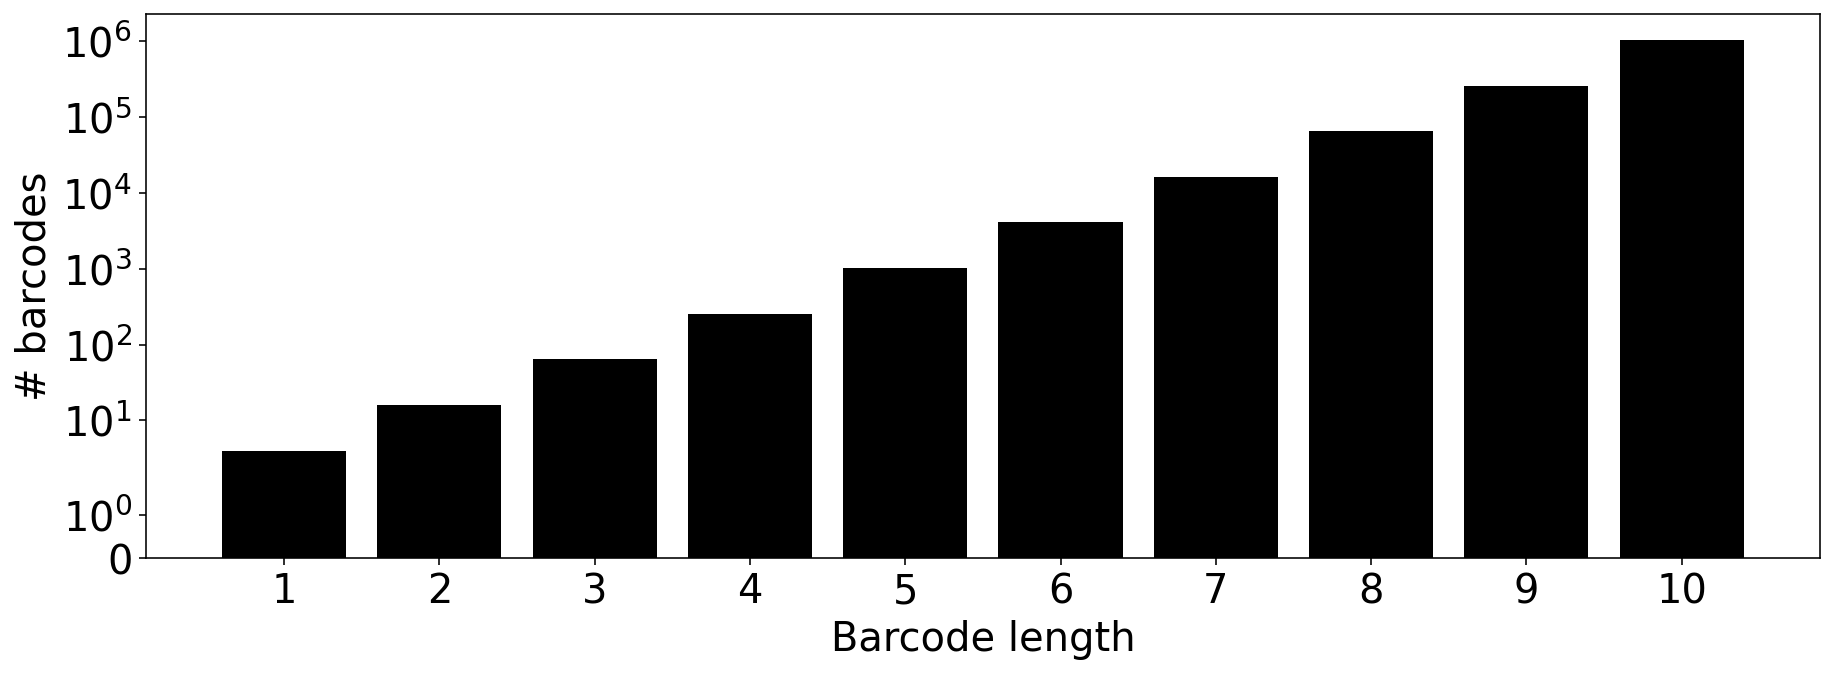

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

x = np.arange (1, bc_len + 1)
y = 4**x

ax.bar(x, y, color="k")
ax.set(**{
    "yscale": "symlog",
    "xticks": x,
    "xlabel": "Barcode length",
    "ylabel": "# barcodes"
})
fig.savefig("barcode_diversity.png", dpi=300, bbox_inches="tight")
fig.show()


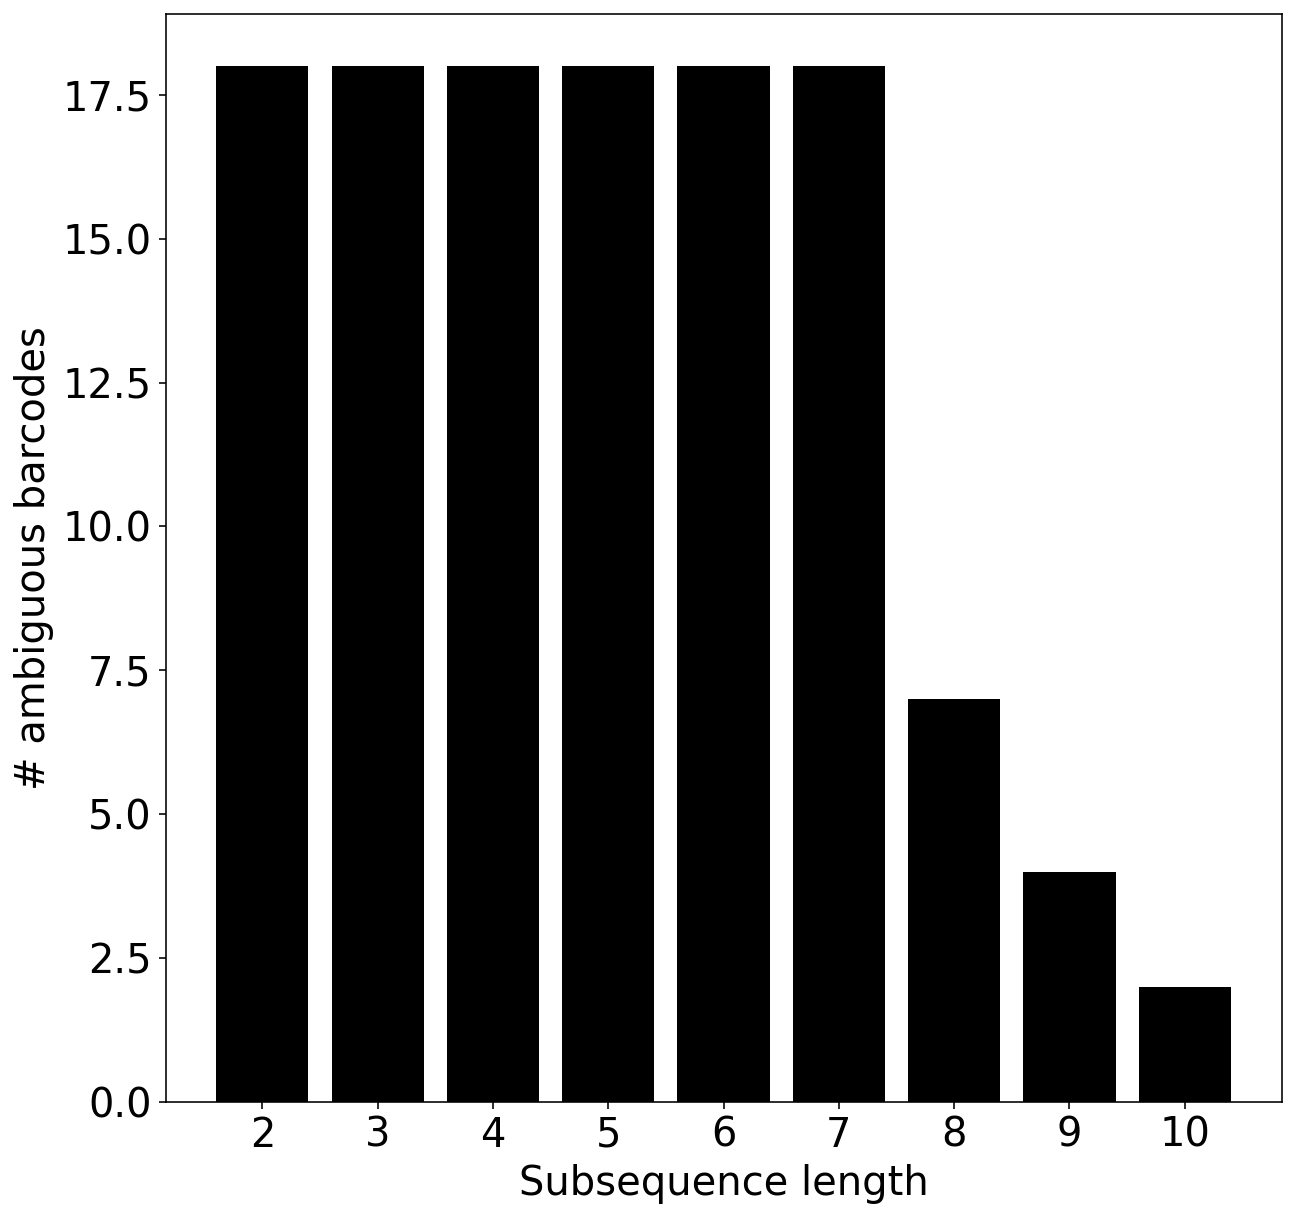

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

x = kmer_lens
y = ambig_bcs

ax.bar(x, y, color="k")
ax.set(**{
    "xticks": x,
    "xlabel": "Subsequence length",
    "ylabel": "# ambiguous barcodes"
})
fig.savefig("shared_subseq.png", dpi=300, bbox_inches="tight")

fig.show()

## Pairwise hamming / edit distance

In [20]:
n_bcs = len(bcs)
mat = np.zeros(( n_bcs, n_bcs ))
for i in range(len(bcs)):
  for j in range(i, len(bcs)):
    first  = np.array(list(bcs[i]))
    second = np.array(list(bcs[j]))
    mat[i,j] = (first!=second).sum()

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [22]:
fig, ax = plt.subplots(figsize=(30,30))

im = ax.imshow(mat.T, cmap="Reds_r")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, label="Distance", cax=cax)

# for (j,i),label in np.ndenumerate(mat.T):
#   ham = mat[i,j]
#   if i <= j:
#     string = f"{ham:,.0f}"
#     ax.text(i,j,string,ha='center',va='center')

ax.set(**{
    "xticklabels": bcs_names,
    "yticklabels": bcs_names,
    "xticks": np.arange(len(bcs_names)),
    "yticks": np.arange(len(bcs_names)),
    "title": "Hamming distance"
})

ax.set_xticklabels(bcs_names, rotation = 90)

# fig.savefig("pairwise.png", dpi=300, bbox_inches="tight")

fig.show()

Error in callback <function flush_figures at 0x7f36d405ce60> (for post_execute):


KeyboardInterrupt: ignored

In [23]:
mat

array([[0., 6., 8., ..., 9., 7., 7.],
       [0., 0., 8., ..., 9., 8., 9.],
       [0., 0., 0., ..., 9., 9., 7.],
       ...,
       [0., 0., 0., ..., 0., 7., 6.],
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
np.min(mat[mat>0])

3.0